# Python for Data Science - Lab 2

#### Authors: Solal Zana and Adam Berdah

## Exercise 1

In [1]:
from os import path
import pandas as pd
import urllib
import zipfile
import sys
import numpy as np
import matplotlib.pyplot as plt
import time

# url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
# filename = 'household_power_consumption'
# zipfilename = filename + '.zip'
# Location = url + zipfilename

# if not(path.isfile('zipfilename')):
#     urllib.request.urlretrieve(Location, zipfilename)

# zip = zipfile.ZipFile(zipfilename)
# zip.extractall()

na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv('/Users/solalzana/Desktop/X/Python for Data Science/Labs/Lab 2/household_power_consumption.txt', sep=';', nrows=200000,
                 na_values=na_values, usecols=fields)
df

,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666
...,...,...,...
199995,4/5/2007,14:39:00,0.348
199996,4/5/2007,14:40:00,0.344
199997,4/5/2007,14:41:00,0.342
199998,4/5/2007,14:42:00,0.340


#### Q1

In [2]:
df[df.isnull().any(axis=1)].count()  # Counting missing values
df = df.dropna() # Dropping missing values

#### Q2

In [3]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=False)
print(df.dtypes) # Making sure type is now datetime
df.set_index('Datetime', drop=True, inplace=True) # setting new column Datetime as index
df.drop(columns=['Date', 'Time'], inplace=True) # Dropping Date and Time columns as we no longer need them

Date                           object
Time                           object
Global_active_power           float64
Datetime               datetime64[ns]
dtype: object


/var/folders/1q/4p_js9jn14x3_527d5fmd8dr0000gn/T/ipykernel_5115/3647412895.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=False)
/var/folders/1q/4p_js9jn14x3_527d5fmd8dr0000gn/T/ipykernel_5115/3647412895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=False)
/var/folders/1q/4p_js9jn14x3_527d5fmd8dr0000gn/T/ipykernel_5115/3647412895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

A DateTimeIndex makes it simple to work with time-based data, meaning you can slice dates, retrieve data of a specific month or day, compare data from a month to another, resample data from daily to monthly etc.

#### Q3

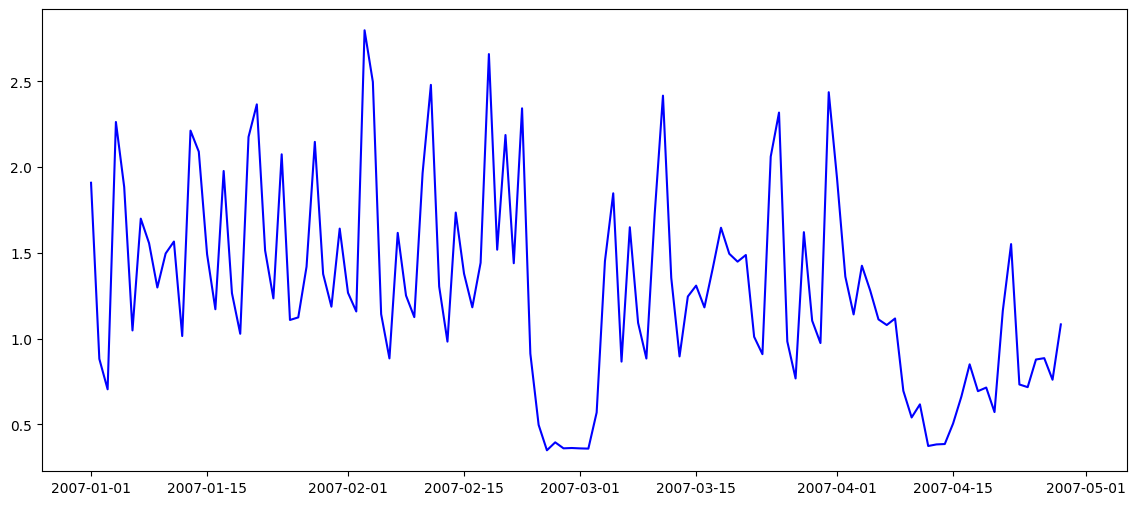

In [4]:
date_range = df.loc['2007-01-01':'2007-04-30',:]
y = date_range['Global_active_power'].resample('D').mean() 
plt.figure(figsize=(14,6))
plt.plot(y, color='blue', label='Daily averages between January 1 2007 and April 30 2007')
plt.show()

#### Q4

In [5]:
df2 = pd.read_csv('/Users/solalzana/Desktop/X/Python for Data Science/Labs/Lab 2/TG_STAID011249.txt', comment="#", na_values=-9999) # the last argument will treat all TGs equal to -9999 as NaNs
df2.columns = df2.columns.str.strip()
df2.drop(columns=['STAID', 'SOUID', 'Q_TG'], inplace=True)
df2['TG'] = df2['TG'] / 10 # Converting to Celsius
print(df2[df2.isna().any(axis=1)]) # Checking that the format for missing values has been replaced

          DATE  TG
176   19210824 NaN
177   19210825 NaN
214   19211001 NaN
307   19220102 NaN
338   19220202 NaN
...        ...  ..
9798  19471228 NaN
9799  19471229 NaN
9800  19471230 NaN
9801  19471231 NaN
9995  19480712 NaN

[8387 rows x 2 columns]


#### Q5

In [6]:
df2['Datetime'] = pd.to_datetime(df2['DATE'], dayfirst=False, format="%Y%m%d")
df2.set_index('Datetime', drop=True, inplace=True)
df2.drop(columns=['DATE'], inplace=True) # need this as drop=True above doesn't delete the original column itself from the dataframe
df2

,TG
Datetime,
1921-03-01,5.0
1921-03-02,4.6
1921-03-03,4.6
1921-03-04,3.1
1921-03-05,9.5
...,...
2016-08-27,26.6
2016-08-28,25.5
2016-08-29,20.6


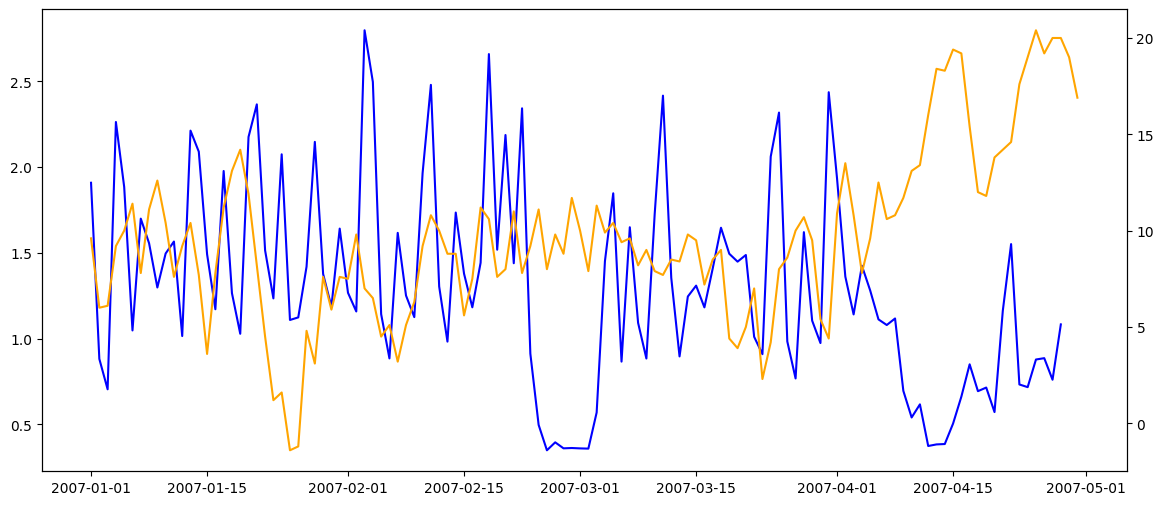

In [7]:
date_range2 = df2.loc['2007-01-01':'2007-04-30',:]
y = date_range['Global_active_power'].resample('D').mean() 
y2 = date_range2['TG'] # change the frequency to daily intervals

fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(y, color='blue', label='Daily averages of active power between January 1 2007 and April 30 2007')

ax2 = ax1.twinx()
ax2.plot(y2, color='orange', label='Daily averages of temperature between January 1 2007 and April 30 2007')

plt.show()

## Exercise 2 (Linear Algebra)

#### Question 6

In [8]:
def verify_property(n, p, lambda_reg=1e-5):
    X = np.random.normal(0, np.sqrt(5), size=(n, p))
    y = np.random.uniform(-1, 1, size=(n,))

    # Left-hand side
    A_left = X.T @ X + lambda_reg * np.eye(p)
    b_left = X.T @ y
    lhs = np.linalg.solve(A_left, b_left)

    # Right-hand side
    A_right = X @ X.T + lambda_reg * np.eye(n)
    b_right = y
    temp = np.linalg.solve(A_right, b_right)
    rhs = X.T @ temp

    # Check if left = right
    diff = np.linalg.norm(lhs - rhs)
    rel_error = diff / np.linalg.norm(lhs)

    print(f"Dimensions: n={n}, p={p}")
    print(f"Norm of left side: {np.linalg.norm(lhs):.6e}")
    print(f"Norm of rigth side: {np.linalg.norm(rhs):.6e}")
    print(f"Absolute difference between right and left-hand side: {diff:.6e}")
    print(f"Relative error: {rel_error:.6e}\n")

    return rel_error

def measure_time(n, p, lambda_reg=1e-5):
    X = np.random.normal(0, np.sqrt(5), size=(n, p))
    y = np.random.uniform(-1, 1, size=(n,))
    times = {}

    # Time for LHS computation
    start_time = time.perf_counter()
    A_left = X.T @ X + lambda_reg * np.eye(p)
    b_left = X.T @ y
    lhs = np.linalg.solve(A_left, b_left)
    lhs_time = time.perf_counter() - start_time

    # Time for RHS computation
    start_time = time.perf_counter()
    A_right = X @ X.T + lambda_reg * np.eye(n)
    b_right = y
    temp = np.linalg.solve(A_right, b_right)
    rhs = X.T @ temp
    rhs_time = time.perf_counter() - start_time

    times['lhs_time'] = lhs_time
    times['rhs_time'] = rhs_time
    return times

# Part 6 (a)
print("Part 6 (a):")
verify_property(n=100, p=2000)

# Part 6 (b)
print("Part 6 (b):")
verify_property(n=2000, p=100)


Part 6 (a):
Dimensions: n=100, p=2000
Norm of left side: 6.087496e-02
Norm of rigth side: 6.087496e-02
Absolute difference between right and left-hand side: 2.873202e-08
Relative error: 4.719842e-07

Part 6 (b):
Dimensions: n=2000, p=100
Norm of left side: 5.207174e-02
Norm of rigth side: 5.207173e-02
Absolute difference between right and left-hand side: 7.929556e-08
Relative error: 1.522814e-06



np.float64(1.5228136500958511e-06)

In this case, where n is smaller than p : we can see that for all points, it's faster to perform the calculation with the left-hand part. It's worth noting that the time scale is smaller for the left-hand side than for the right-hand side, which leaves us in no doubt as to the efficiency of the left-hand side compared with the right-hand side. 

Algebraically, this seems coherent. The left-hand side involves calculating the inverse of a matrix of size n x n. So it's consistent to think that it takes less time to calculate when n is smaller.

#### Question 7

Timing for varying p with n fixed at 100:
p=500: LHS Time=0.001993s, RHS Time=0.000184s
p=1000: LHS Time=0.006390s, RHS Time=0.000168s
p=1500: LHS Time=0.021325s, RHS Time=0.000218s
p=2000: LHS Time=0.040936s, RHS Time=0.000236s
p=2500: LHS Time=0.099881s, RHS Time=0.000308s
p=3000: LHS Time=0.157468s, RHS Time=0.000316s
p=3500: LHS Time=0.262884s, RHS Time=0.000442s
p=4000: LHS Time=0.377706s, RHS Time=0.000366s
p=4500: LHS Time=0.528697s, RHS Time=0.000428s
p=5000: LHS Time=0.659933s, RHS Time=0.000432s

Timing for varying n with p fixed at 100:
n=500: LHS Time=0.000179s, RHS Time=0.001484s
n=1000: LHS Time=0.000109s, RHS Time=0.006300s
n=1500: LHS Time=0.000151s, RHS Time=0.021188s
n=2000: LHS Time=0.000157s, RHS Time=0.040647s
n=2500: LHS Time=0.000172s, RHS Time=0.093358s
n=3000: LHS Time=0.000194s, RHS Time=0.129690s
n=3500: LHS Time=0.000214s, RHS Time=0.238680s
n=4000: LHS Time=0.000233s, RHS Time=0.358421s
n=4500: LHS Time=0.000290s, RHS Time=0.499686s
n=5000: LHS Time=0.00033

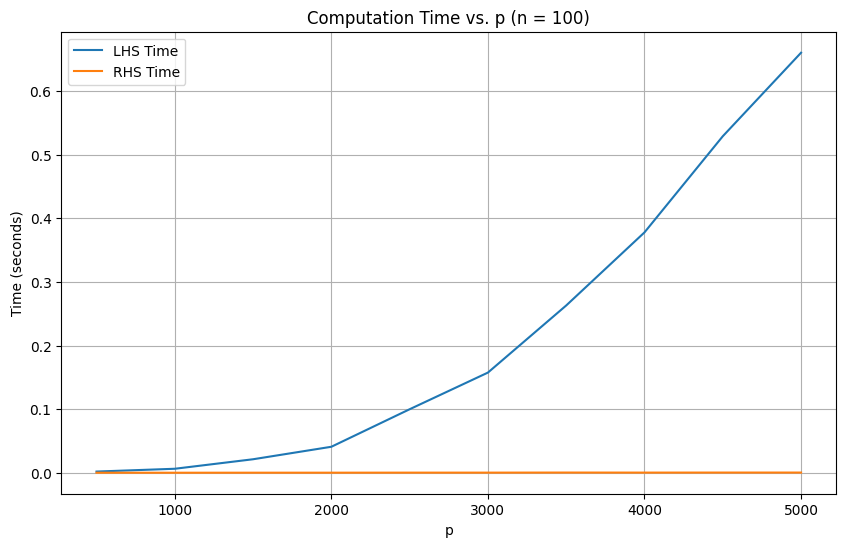

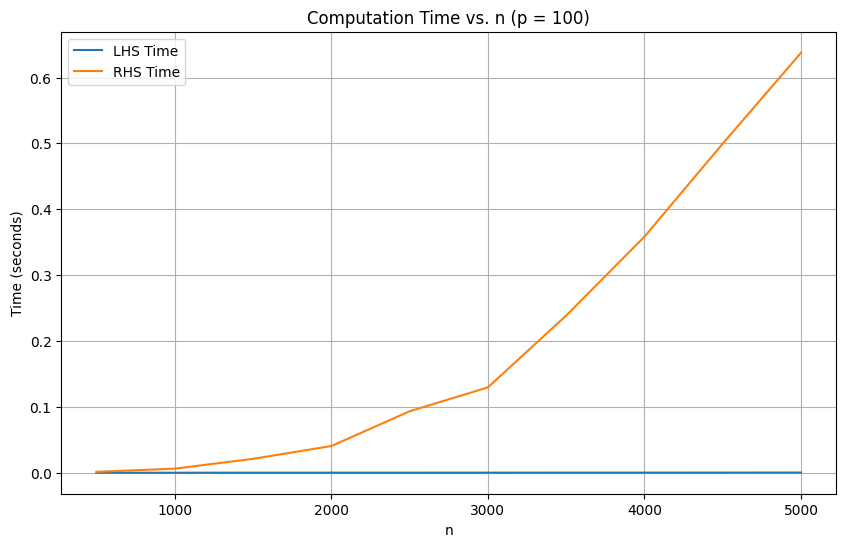

In [9]:
lambda_reg = 1e-5
n_values_p_fixed = range(500, 5500, 500)
p_values_n_fixed = range(500, 5500, 500)

# Results for p >> n
n_fixed = 100
lhs_times_p = []
rhs_times_p = []

print("Timing for varying p with n fixed at 100:")
for p in p_values_n_fixed:
    times = measure_time(n_fixed, p, lambda_reg)
    lhs_times_p.append(times['lhs_time'])
    rhs_times_p.append(times['rhs_time'])
    print(f"p={p}: LHS Time={times['lhs_time']:.6f}s, RHS Time={times['rhs_time']:.6f}s")

# Results for n >> p
p_fixed = 100
lhs_times_n = []
rhs_times_n = []

print("\nTiming for varying n with p fixed at 100:")
for n in n_values_p_fixed:
    times = measure_time(n, p_fixed, lambda_reg)
    lhs_times_n.append(times['lhs_time'])
    rhs_times_n.append(times['rhs_time'])
    print(f"n={n}: LHS Time={times['lhs_time']:.6f}s, RHS Time={times['rhs_time']:.6f}s")

plt.figure(figsize=(10, 6))
plt.plot(p_values_n_fixed, lhs_times_p, label='LHS Time')
plt.plot(p_values_n_fixed, rhs_times_p, label='RHS Time')
plt.title('Computation Time vs. p (n = 100)')
plt.xlabel('p')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(n_values_p_fixed, lhs_times_n, label='LHS Time')
plt.plot(n_values_p_fixed, rhs_times_n, label='RHS Time')
plt.title('Computation Time vs. n (p = 100)')
plt.xlabel('n')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 3 (Random matrix spectrum)

#### Question 8

In [10]:
def generate_random_matrix(n, p, distribution):
    if distribution == 'uniform':
        # Uniform over [-sqrt(6), sqrt(6)]
        a = -np.sqrt(6)
        b = np.sqrt(6)
        X = np.random.uniform(a, b, size=(n, p))
    elif distribution == 'laplace':
        # Laplace with scale parameter b = 1
        X = np.random.laplace(loc=0.0, scale=1.0, size=(n, p))
    elif distribution == 'student_t':
        # Student's t-distribution with nu = 4 degrees of freedom
        X = np.random.standard_t(df=4, size=(n, p))
    else:
        raise ValueError("Invalid distribution name. Choose from 'uniform', 'laplace', 'student_t'.")
    
    return X


#### Question 9

In [11]:
def plot_singular_values(n, p_values, distributions):
    plt.figure(figsize=(12, 8))
    
    for distribution in distributions:
        for p in p_values:
            X = generate_random_matrix(n, p, distribution)
            singular_values = np.linalg.svd(X, compute_uv=False)
            singular_values.sort()
            singular_values = singular_values[::-1]  # Descending order
            
            plt.plot(singular_values, label=f'{distribution}, p={p}')
    
    plt.title('Singular Values of X for Different Distributions and p')
    plt.xlabel('Index')
    plt.ylabel('Singular Value')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()


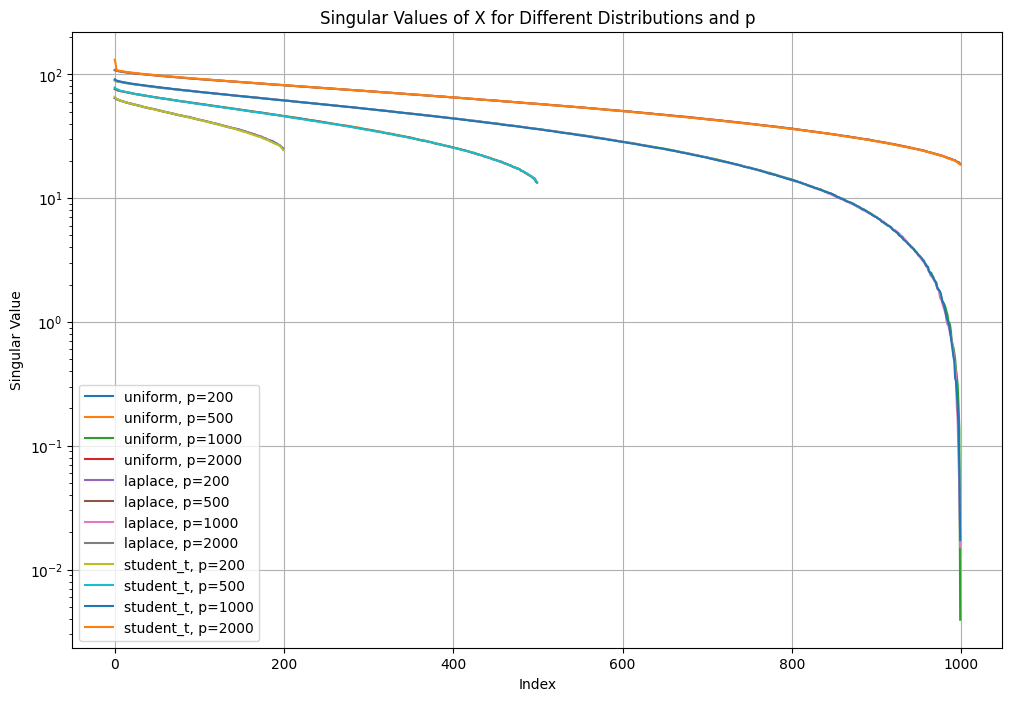

In [12]:
n = 1000
p_values = [200, 500, 1000, 2000]
distributions = ['uniform', 'laplace', 'student_t']

plot_singular_values(n, p_values, distributions)

#### Question 10

In [13]:
def plot_eigenvalues(n, p_values, distributions):
    plt.figure(figsize=(12, 8))
    
    for distribution in distributions:
        for p in p_values:
            X = generate_random_matrix(n, p, distribution)
            S = (X.T @ X) / n
            eigenvalues = np.linalg.eigvalsh(S)
            eigenvalues.sort()
            
            plt.plot(eigenvalues, label=f'{distribution}, p={p}')
    
    plt.title('Eigenvalues of X^T X / n for Different Distributions and p')
    plt.xlabel('Index')
    plt.ylabel('Eigenvalue')
    plt.legend()
    plt.grid(True)
    plt.show()

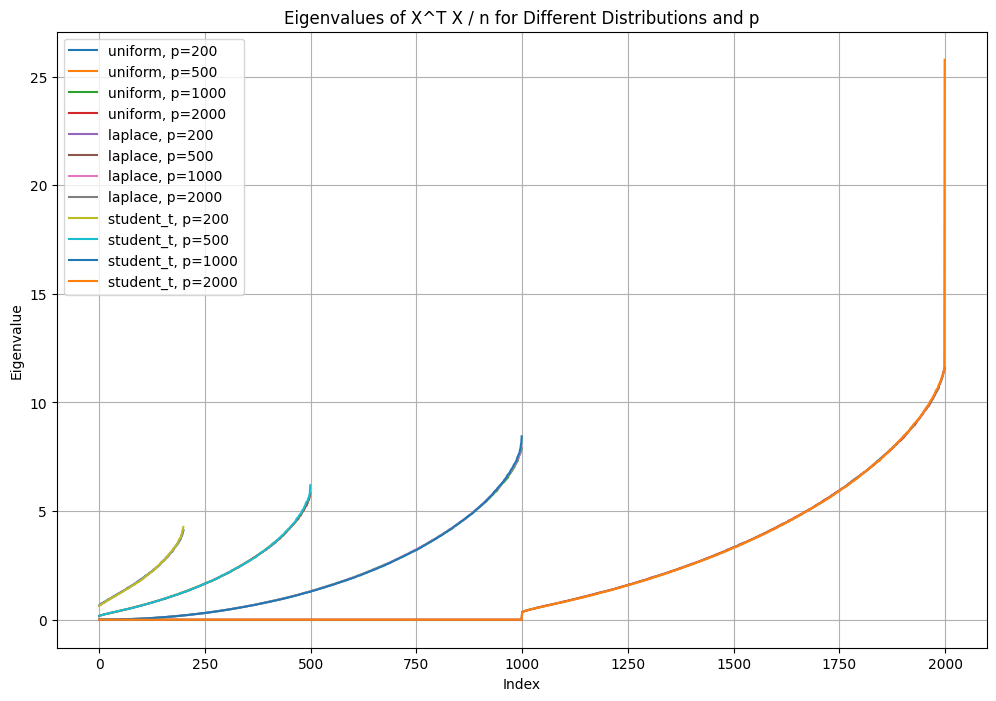

In [14]:
n = 1000
p_values = [200, 500, 1000, 2000]
distributions = ['uniform', 'laplace', 'student_t']

plot_eigenvalues(n, p_values, distributions)


## Exercise 4 (Power method)

In [15]:
def generate_X(n=200, p=400):
    X = np.random.normal(0, np.sqrt(5), size=(n, p))
    return X

#### Question 11

In [16]:
def power_method(X, T):
    n, p = X.shape
    # Initialize v_0 randomly
    v = np.random.randn(p)
    v = v / np.linalg.norm(v)
    
    for k in range(T):
        Xv = X @ v
        u = Xv / np.linalg.norm(Xv)
        XTu = X.T @ u
        v = XTu / np.linalg.norm(XTu)
    
    return u, v

#### Question 12

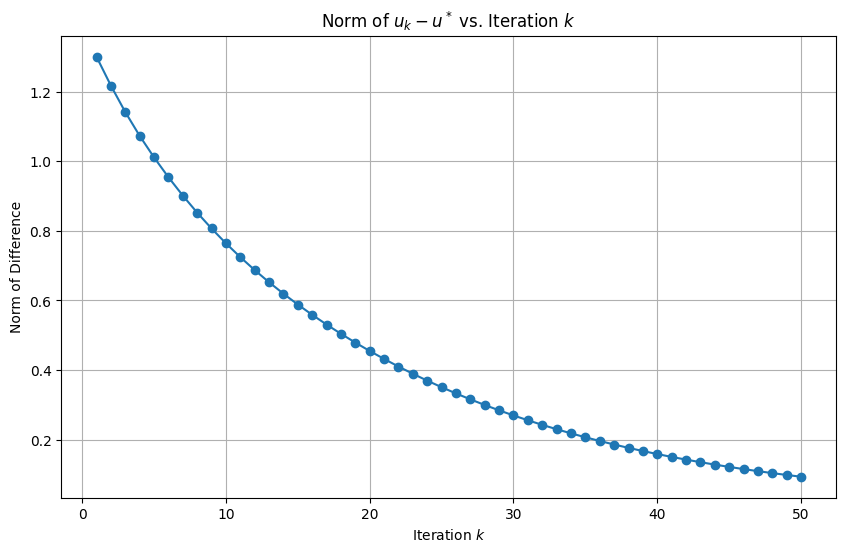

In [17]:
def power_method_with_history(X, T):
    n, p = X.shape
    v = np.random.randn(p)
    v = v / np.linalg.norm(v)
    
    u_list = []
    v_list = [v]
    
    for k in range(T):
        Xv = X @ v
        u = Xv / np.linalg.norm(Xv)
        u_list.append(u)
        XTu = X.T @ u
        v = XTu / np.linalg.norm(XTu)
        v_list.append(v)
    
    return u_list, v_list


def compute_leading_singular_vectors(X):
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    u_star = U[:, 0]
    v_star = Vt.T[:, 0]
    return u_star, v_star


# Parameters
n, p = 200, 400
T = 50  # Number of iterations

# Generate matrix X
X = np.random.normal(0, np.sqrt(5), size=(n, p))

# Apply the power method with history
u_list, v_list = power_method_with_history(X, T)

# Compute the leading singular vectors using SVD
u_star, v_star = compute_leading_singular_vectors(X)

# Compute the norms of differences
norms = [np.linalg.norm(u_k - u_star) for u_k in u_list]

plt.figure(figsize=(10, 6))
plt.plot(range(1, T + 1), norms, marker='o')
plt.title('Norm of $u_k - u^*$ vs. Iteration $k$')
plt.xlabel('Iteration $k$')
plt.ylabel('Norm of Difference')
plt.grid(True)
plt.show()

#### Question 13

In [18]:
# Compute the leading right singular vector v_star
u_star, v_star = compute_leading_singular_vectors(X)

# Generate a random vector
v0_random = np.random.randn(p)

# Orthogonalize v0_random against v_star
v0_orthogonal = v0_random - (v_star @ v0_random) * v_star
v0_orthogonal /= np.linalg.norm(v0_orthogonal)

# Compute the second right singular vector v_second
U, S, Vt = np.linalg.svd(X, full_matrices=False)
v_second = Vt.T[:, 1]  # Second singular vector
v0_second = v_second.copy()

def power_method_with_custom_v0(X, T, v0):
    v = v0.copy()
    for k in range(T):
        Xv = X @ v
        u = Xv / np.linalg.norm(Xv)
        XTu = X.T @ u
        v = XTu / np.linalg.norm(XTu)
    return u, v

# Run the algorithm
u_final1, v_final1 = power_method_with_custom_v0(X, T, v0_orthogonal)

# Compute cosine similarities
cos_sim_v1_vstar = np.abs(np.dot(v_final1, v_star))
cos_sim_v1_vsecond = np.abs(np.dot(v_final1, v_second))

print("Results starting from v0 orthogonal to v_star:")
print(f"Cosine similarity between final v and v_star: {cos_sim_v1_vstar:.6f}")
print(f"Cosine similarity between final v and v_second: {cos_sim_v1_vsecond:.6f}")


# Run the algorithm
u_final2, v_final2 = power_method_with_custom_v0(X, T, v0_second)

# Compute cosine similarities
cos_sim_v2_vstar = np.abs(np.dot(v_final2, v_star))
cos_sim_v2_vsecond = np.abs(np.dot(v_final2, v_second))

print("\nResults starting from v0 aligned with v_second:")
print(f"Cosine similarity between final v and v_star: {cos_sim_v2_vstar:.6f}")
print(f"Cosine similarity between final v and v_second: {cos_sim_v2_vsecond:.6f}")




Results starting from v0 orthogonal to v_star:
Cosine similarity between final v and v_star: 0.000000
Cosine similarity between final v and v_second: 0.625755

Results starting from v0 aligned with v_second:
Cosine similarity between final v and v_star: 0.000000
Cosine similarity between final v and v_second: 1.000000


#### Question 14

In [19]:
def power_method_with_singular_value(X, T):
    n, p = X.shape
    v = np.random.randn(p)
    v = v / np.linalg.norm(v)
    
    for k in range(T):
        Xv = X @ v
        u = Xv / np.linalg.norm(Xv)
        XTu = X.T @ u
        v = XTu / np.linalg.norm(XTu)
    
    sigma = np.linalg.norm(X @ v)
    return sigma, u, v

sigma_approx, u_approx, v_approx = power_method_with_singular_value(X, T)
print(f"Approximated largest singular value: {sigma_approx:.6f}")

# Compare with true largest singular value
U, S, Vt = np.linalg.svd(X, full_matrices=False)
sigma_true = S[0]
print(f"True largest singular value: {sigma_true:.6f}")



Approximated largest singular value: 74.190058
True largest singular value: 74.292360


#### Question 15

In [20]:
def power_method_second_singular_value(X, T):

    # find the leading singular vectors and value
    sigma1, u1, v1 = power_method_with_singular_value(X, T)
    
    # Deflate the matrix
    X_deflated = X - sigma1 * np.outer(u1, v1)
    
    # Apply the power method to the deflated matrix
    v = np.random.randn(X.shape[1])
    v = v / np.linalg.norm(v)
    
    for k in range(T):
        Xv = X_deflated @ v
        u = Xv / np.linalg.norm(Xv)
        XTu = X_deflated.T @ u
        v = XTu / np.linalg.norm(XTu)
    
    sigma2 = np.linalg.norm(X_deflated @ v)
    return sigma2, u, v

sigma2_approx, u2_approx, v2_approx = power_method_second_singular_value(X, T)
print(f"Approximated second-largest singular value: {sigma2_approx:.6f}")

# Compare with true second-largest singular value
U, S, Vt = np.linalg.svd(X, full_matrices=False)
sigma2_true = S[1]
print(f"True second-largest singular value: {sigma2_true:.6f}")



Approximated second-largest singular value: 73.128185
True second-largest singular value: 73.203281


## Exercise 5

#### Question 16

In [21]:
df3 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original", sep=r"\s+", names=["mpg", "cylinders", "displacement", "horsepower","weight", "acceleration", "model year", "origin", "car name"], na_values='NA')
# sep=r"\s+" treats every space as a comumn separation 
# specified na_values here even though after some testing python seems to automatically treat 'NA' string as a missing value (maybe a common standard)

df3[df3.isna().any(axis=1)] # checking the rows of the missing values
df3.dropna(inplace=True)
df3.drop(columns='car name', inplace=True)
df3

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


#### Question 17

In [22]:
# Create binary features for each origin
df3['origin_USA'] = (df3['origin'] == 1).astype(int)
df3['origin_Europe'] = (df3['origin'] == 2).astype(int)
df3['origin_Japan'] = (df3['origin'] == 3).astype(int)

# Drop the original 'origin' column
df3.drop(columns=['origin'], inplace=True)

#### Question 18

In [34]:
# np.random.seed(58493)
# print(df3.loc[df3['origin_USA']==1].sample(3))
# print(df3.loc[df3['origin_Europe']==1].sample(3))
# print(df3.loc[df3['origin_Japan']==1].sample(3))

from sklearn.linear_model import LinearRegression

new_df = df3.loc[[179, 246, 378, 342, 193, 333, 389, 151, 341]]
print(new_df)

X = new_df.drop(columns=["mpg"])
y = new_df["mpg"]

model = LinearRegression()
model.fit(X, y)

theta_hat = model.coef_
y_hat = model.predict(X)

print(f"least-squares estimator θ^ : {theta_hat}")
print()
print(f"Intercept:{model.intercept_}")
print()
print(f"prediction vector y^ : {y_hat}")


      mpg  cylinders  displacement  horsepower  weight  acceleration  \
179  25.0        4.0          90.0        71.0  2223.0          16.5   
246  30.0        4.0          97.0        67.0  1985.0          16.4   
378  31.0        4.0         112.0        85.0  2575.0          16.2   
342  35.0        4.0         122.0        88.0  2500.0          15.1   
193  27.0        4.0         101.0        83.0  2202.0          15.3   
333  43.4        4.0          90.0        48.0  2335.0          23.7   
389  36.0        4.0         107.0        75.0  2205.0          14.5   
151  31.0        4.0          76.0        52.0  1649.0          16.5   
341  23.7        3.0          70.0       100.0  2420.0          12.5   

     model year  origin_USA  origin_Europe  origin_Japan  
179        75.0           0              1             0  
246        77.0           0              0             1  
378        82.0           1              0             0  
342        80.0           0              1 

In [35]:
np.var(theta_hat)

np.float64(100.36400391947609)

We notice a high variance in our estimator, due to the fact that we didn't train on enough points and that all the variables are not all at the same scale!

#### Question 19

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df3.drop(columns=["mpg"])) # fits and standardizes data at the same time
y = df3["mpg"]

model = LinearRegression()
model.fit(X, y)

theta_hat = model.coef_ 
y_hat = model.predict(X)

print(f"least-squares estimator θ^ : {theta_hat}")
print()
print(f"Intercept: {model.intercept_}")
print()
print(f"prediction vector y^ : {y_hat}")

least-squares estimator θ^ : [23.44591837 -0.83427197  2.50601874 -0.69900932 -5.69254264  0.21795599
  2.85870923 -0.75153855  0.40804774  0.52183015]

Intercept: 23.44591836734694

prediction vector y^ : [14.95325212 14.04009845 15.23055101 14.99408418 14.90194083 10.86737355
 10.90046541 10.89796633 10.4361925  13.2538182  15.49417177 14.17804097
 14.89727042 19.42139684 23.58334628 18.73494838 19.11847276 20.65504633
 24.91133367 27.90599482 21.61829455 22.87841207 23.32193906 23.95292263
 20.05171389  7.38149512  8.06626378  7.98927737  6.00957598 25.68836061
 23.00975871 25.2475655  21.37394075 15.91107129 17.33959697 17.73897891
 17.18310712 11.3941187  10.66051679 12.12402459 11.73693049  6.86716392
  8.8986573   6.16384864 19.65409638 22.64762637 17.6154335  18.75366848
 22.82747932 25.89178322 26.13211819 25.90370348 28.23470633 29.18050954
 28.3165091  24.66749831 25.80772779 23.99421548 26.74023915 23.13690248
 23.76200154 11.73497067 12.00721559 12.29180397 13.02925962 14.

The variables which best explain the model are the ones with the corresponding estimated coefficient having the highest absolute value. Here Weight is the most significant, followed by Displacement and Model Year.

If we didn't normalize our data, features with larger scales (like weight and displacement) would dominate the regression, resulting in a biased model. The coefficients would be less reliable and would not correctly reflect to what extend they can predict actual values, hence comparing the importance of features would be meaningless because each coefficient’s magnitude would depend on the units and scale of its feature. Normalization ensures that all features are on an equal footing, making the model more reliable in the end.

#### Question 20

In [40]:
from sklearn.pipeline import Pipeline 

new_car_value = [[6, 225, 100, 3233, 15.4, 117, 1, 0, 0]]

X = scaler.fit_transform(df3.drop(columns=["mpg"])) # fits and standardizes data at the same time
y = df3["mpg"]

# Create a pipeline for scaling and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipeline.fit(X, y)

predicted_consumption = pipeline.predict(new_car_value) # prediction for the new car

print(f"Predicted fuel consumption (mpg) for the new car:{predicted_consumption}")

Predicted fuel consumption (mpg) for the new car:[-5.07784741e+13]


This value is not coherent at all, it is immensely large and negative so it cannot be right.